# Lab 2

In this lab we will:
- Introduce the stastical model behind simple linear regression,
- Learn about train test splits,
- Look at explanatory slr, and
- End with predictive slr.

## Regression Modeling

Let's say we have a data set and we've collected some features, $X$, and some output data, $y$, and we believe there is some true relationship between the two:

$$
y = f(X) + \epsilon,
$$
called the <i>model</i>.

When the output is numerical, we call it regression model. It is common to say that we are regressing $y$ on $X$.

### Example

In this example we will consider sales based on 'TV' marketing budget from
https://raw.githubusercontent.com/devzohaib/Simple-Linear-Regression/master/tvmarketing.csv

We'll build a linear regression model to predict 'Sales' using 'TV' as the predictor variable.

In [ ]:
# Use pandas to import the data
#tvmarketing

import pandas as pd

tv = pd.read_csv('https://raw.githubusercontent.com/devzohaib/Simple-Linear-Regression/master/tvmarketing.csv')

In [ ]:
## Use .copy() to make a copy of the original dataframe so we dont mess the original data.

# tvmarketing_copy =
tv_copy = tv.copy()

Now examine your dataset (for example, what is the size of your table? what are your features?)

In [ ]:
# you code
print(tv)

        TV  Sales
0    230.1   22.1
1     44.5   10.4
2     17.2    9.3
3    151.5   18.5
4    180.8   12.9
..     ...    ...
195   38.2    7.6
196   94.2    9.7
197  177.0   12.8
198  283.6   25.5
199  232.1   13.4

[200 rows x 2 columns]


In [ ]:
# use .info() to check your columns
tv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [ ]:
# use .describe() to look at some statistical information about the dataframe.
tv.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


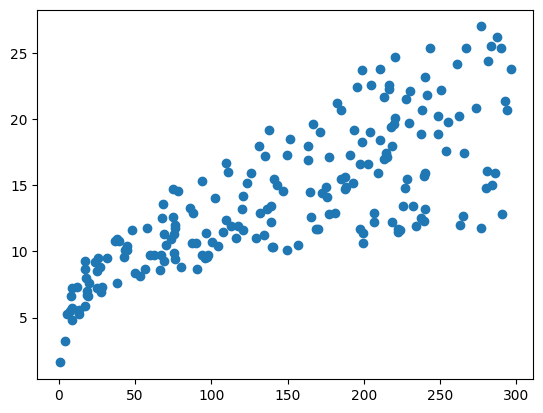

In [ ]:
# plot your data to Visualise the relationship between the features
import matplotlib.pyplot as plt


plt.scatter(tv["TV"],tv["Sales"])
plt.show()

### Training Test Split

Imagine you're teaching a dog new tricks. To make sure your pup can do more than just roll over at home, you decide to test their skills in the park.

**Training:** At home, you teach your dog the basics, like sit, stay, and fetch. This is your "training" phase. Your dog learns from your commands, but it's still in familiar surroundings.

But here's the catch: just because your dog listens at home doesn't mean they'll follow your orders in the park with distractions.

**Testing:** So, you go to the park, where there are squirrels, other dogs, and tons of distractions. This is like your "test" phase. You want to see if your dog can perform the tricks they learned at home in this new, more challenging environment.

In the same way, in machine learning, we want to set aside a small subset of the data for testing purposes. This is known as making the <i>train test split</i>. The test data exists as a sanity check to see if the model is as good as the training data tells us.



Let's use `pandas` to make our train test split.

In [ ]:
## Now use .sample(frac = , random_state = 440) to make a random sample
## frac allows us to choose a fraction of the df
## it is common to set aside 25% for testing
##random_state is the seed used by the random number generator, it can be any integer.


tv_train = tv.sample(frac = 0.75, random_state = 440)

In [ ]:
## now use .drop and the train index to make test
#tvmarketing_test = tvmarketing_copy.drop(tvmarketing_train.index)

tv_test = tv_copy.drop(tv_train.index)

Lets stop and understand the general structure of modeling using the `scikit-learn library`. The steps to build any model can be divided as follows:

-  X (feature variable) and y (output variable) need to be NumPy arrays.
-  But its okay to use Pandas dataframe as Pandas is built over NumPy.

In [ ]:
# Define X (tv from train dataset)
import numpy as np

X_train = np.array(tv_train["TV"]).reshape(-1,1)

In [ ]:
# define Y (sales from train dataset)

y_train = np.array(tv_train["Sales"]).reshape(-1,1)

If you extract your features X and y from the original dataset, rather than just the training dataset, you can also perform the train-test split using scikit-learn (sklearn) in Python. Note that running the next cell will overwrite your X and y, so practice this later at home.

In [ ]:
from sklearn.model_selection import train_test_split

Now lets perform linear regression using sklearn library (check the documentation if you need help!)

In [ ]:
from sklearn.linear_model import LinearRegression

X_train

#Representing LinearRegression as reg, create a LinearRegression bbject
reg = LinearRegression()

# Fit the model using lr.fit()
reg.fit(X_train, y_train)

LinearRegression()

Alright! You now have your model ($ sales = \beta_0 + \beta_1 \times TV$). Let's print your model's parameters:

In [ ]:
# Print the intercept and coefficients
print(reg.intercept_)
print(reg.coef_)

[6.86407506]
[[0.04857609]]


Write down your equation!

Now, let's use this equation to predict our sales.

In [ ]:
# Find the X and y from test datasets
X_test = np.array(tv_train["TV"]).reshape(-1,1)

y_test = np.array(tv_train["Sales"]).reshape(-1,1)

NameError: ignored

In [ ]:
# Prediction!
# Use reg.predict(X_test) to see what is the model prediction. Store your result in y_pred.

y_pred = reg.predict(X_test)
print(y_pred)

[[13.3878442 ]
 [15.46204333]
 [ 9.03542637]
 [ 7.12638596]
 [ 8.70996656]
 [11.15334398]
 [14.96656719]
 [17.47795114]
 [ 8.07847736]
 [12.34831584]
 [10.57528848]
 [ 8.19991759]
 [17.09905762]
 [17.5653881 ]
 [15.46204333]
 [18.67778061]
 [10.57043087]
 [ 8.39422196]
 [18.52719472]
 [14.47109105]
 [ 7.77244798]
 [10.52185478]
 [13.72787685]
 [10.57528848]
 [ 8.25335129]
 [14.22335298]
 [ 7.43241534]
 [12.19772995]
 [12.49890172]
 [16.46271082]
 [11.58567119]
 [19.19268718]
 [12.08114733]
 [16.46271082]
 [ 9.29287966]
 [19.6250144 ]
 [21.2620287 ]
 [13.67930075]
 [ 6.89807833]
 [ 8.16591433]
 [13.48013878]
 [14.0193334 ]
 [ 9.59405143]
 [19.74645463]
 [15.39889441]
 [18.39603927]
 [ 7.50042187]
 [14.80626609]
 [15.04428894]
 [17.57510332]
 [ 9.02571115]
 [11.8528397 ]
 [11.09991028]
 [18.0414338 ]
 [17.23021307]
 [20.93656888]
 [17.29336199]
 [10.75987763]
 [11.02704614]
 [15.24345091]
 [13.56271813]
 [16.8221739 ]
 [ 9.75921014]
 [11.74111469]
 [14.85484218]
 [18.52719472]
 [10.15753

How do we check if it did a good job predicting the $y$ values? Well, we can simple compare y_text and y_pred. Lets plot them:

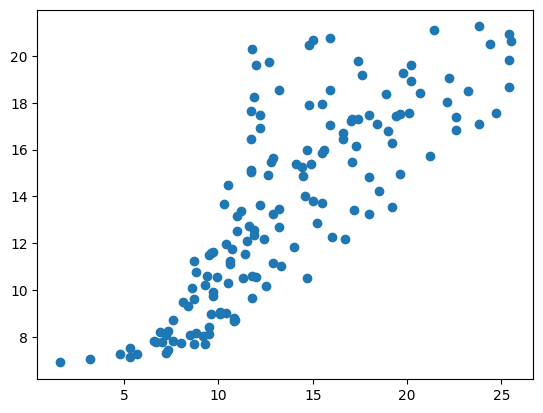

In [ ]:
# you code!
#Actual vs Predicted

plt.scatter(y_test, y_pred)

We can create a new list by subtracting the predicted values (y-pred) from the actual values (y_test), and then plot this list to assess the performance of your model.

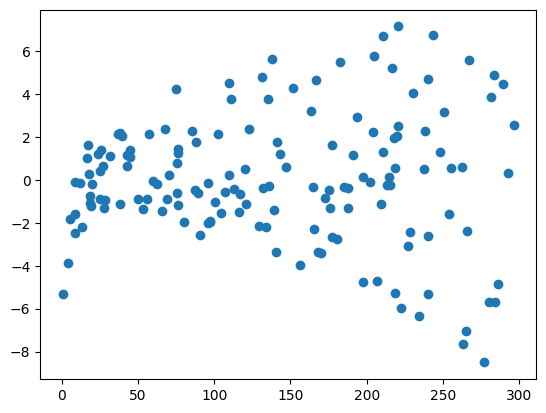

In [ ]:
# you code
# plot (y_test - y_pred)
plt.scatter(X_test, y_test - y_pred)

But it would be nice to quantify the performance! To do so, we use Root Mean Square Error (RMSE) and R-squared $(R^2)$ Values.

RMSE (Root Mean Square Error) and $R^2$ are both commonly used metrics in regression analysis to assess the performance of a regression model. RMSE measures the accuracy of predictions by quantifying the error between predicted and actual values, while R^2 measures how well the independent variables in the model explain the variation in the dependent variable. A high R^2 value and a low RMSE value are generally indicative of a good regression model.

For example,
$RMSE = 7.9$ means that this model is not able to match the $7.9$ percent of the values. And
$R^2 = 0.72$ means that your model is $72\%$ accurate on test data .

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
rmse = mean_squared_error(y_test, y_pred)
print(rmse)

8.823769339178577


Congratulations! You are done with lab 2!

__More on MSRE and R^2__

<span style="color:blue">RMSE (Root Mean Square Error):</span>
The RMSE is a measure of the average deviation between the predicted values of a regression model and the actual observed values. It quantifies the accuracy of predictions by calculating the square root of the mean of the squared differences between predicted and actual values. RMSE is expressed in the same units as the dependent variable (the variable you are trying to predict) and provides a measure of how much, on average, your predictions deviate from the true values. Lower RMSE values indicate better model performance, with values closer to 0 indicating a more accurate model.

RMSE is calculated as follows:

$
\text{RMSE} = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}
$
Where:
\begin{align*}
y_i & : \text{Actual or observed values} \\
\hat{y}_i & : \text{Predicted values} \\
n & : \text{Number of data points}
\end{align*}


<span style="color:blue">\(R^2\) (Coefficient of Determination):</span>
The \(R^2\) value measures the proportion of the variance in the dependent variable that is explained by the independent variables in a regression model. It ranges between 0 and 1, where 0 indicates that the model does not explain any variance, and 1 indicates that the model explains all the variance. \(R^2\) is a relative measure of goodness of fit, showing how well the model fits the data compared to a simple horizontal line (the mean of the dependent variable). Higher \(R^2\) values indicate that a larger proportion of the variance in the dependent variable is explained by the model, suggesting a better fit.
